<a href="https://colab.research.google.com/github/gskumlehn/autism-info-llm-comparison/blob/main/sentiment_analysis_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

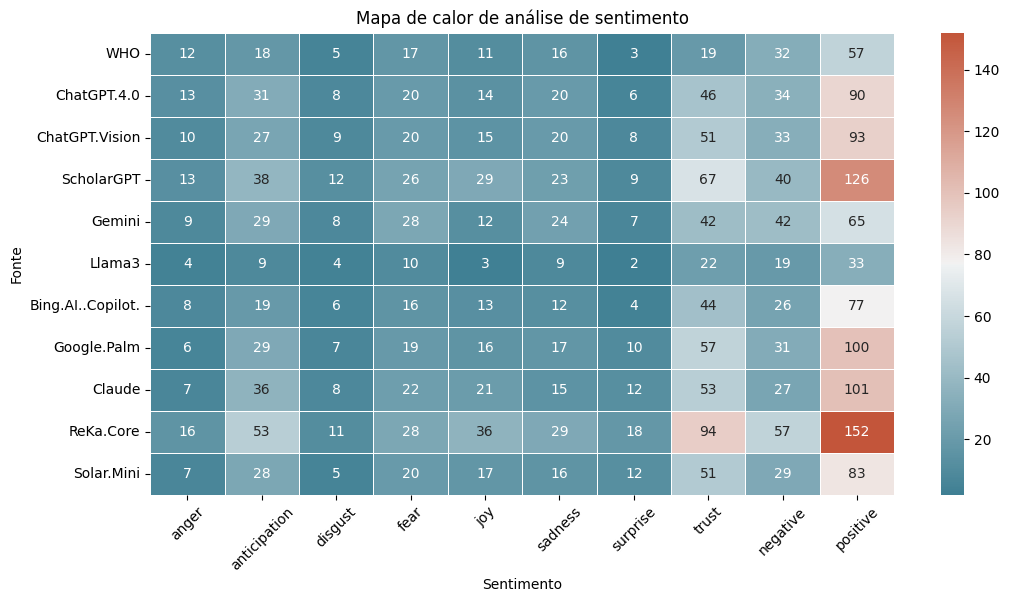

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_sentiments = pd.read_csv("sentiment_analysis_results.csv")
df_sentiments.set_index("Model", inplace=True)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(12, 6))
sns.heatmap(df_sentiments, cmap=cmap, annot=True, fmt="d", linewidths=0.5, cbar=True)
plt.title("Mapa de calor de análise de sentimento")
plt.xlabel("Sentimento")
plt.ylabel("Fonte")
plt.xticks(rotation=45)
plt.show()


In [8]:
df_ratio = df_sentiments[["positive", "negative"]].copy()
df_ratio["positive_negative_ratio"] = df_ratio["positive"] / df_ratio["negative"]


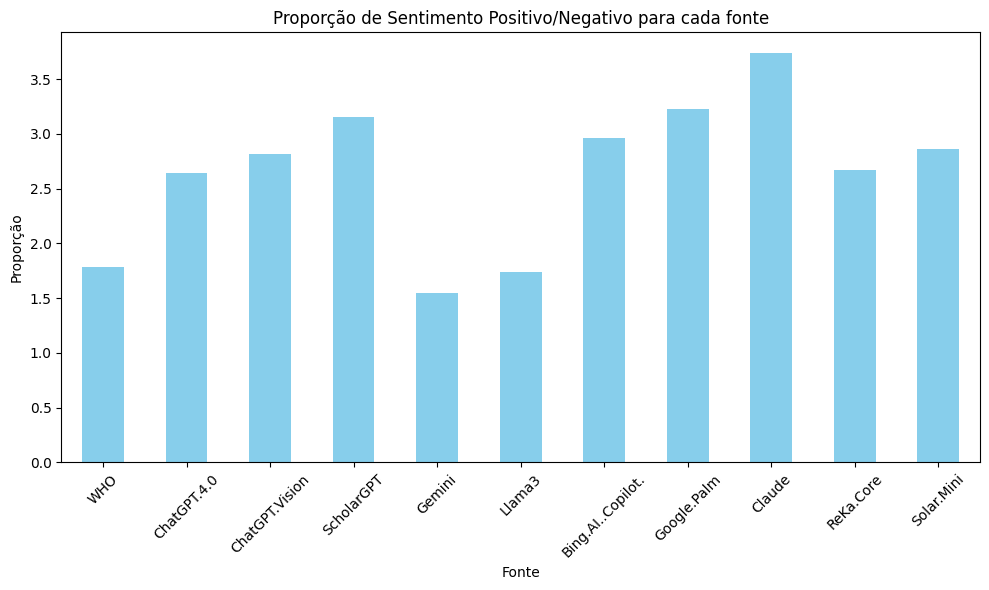

In [12]:
plt.figure(figsize=(10, 6))
df_ratio["positive_negative_ratio"].plot(kind='bar', color='skyblue')
plt.title('Proporção de Sentimento Positivo/Negativo para cada fonte')
plt.xlabel('Fonte')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()